In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data Assignment - Arya.csv")
df.info()
print(df.isnull().sum())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Day                       61 non-null     object 
 1   Date                      61 non-null     object 
 2   Leads                     41 non-null     float64
 3   Time spent on LG (mins)   41 non-null     float64
 4   Avg Time Per Lead (mins)  41 non-null     float64
 5   Daily Team Review         41 non-null     object 
 6   No. of Incomplete Leads   41 non-null     float64
dtypes: float64(4), object(3)
memory usage: 3.5+ KB
Day                          0
Date                         0
Leads                       20
Time spent on LG (mins)     20
Avg Time Per Lead (mins)    20
Daily Team Review           20
No. of Incomplete Leads     20
dtype: int64


,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),No. of Incomplete Leads
count,41.000000,41.000000,41.00000,41.000000
mean,11.560976,135.829268,12.02439,0.219512
std,2.156951,26.386457,3.58809,1.405564
min,5.000000,46.000000,9.00000,0.000000
25%,10.000000,123.000000,10.00000,0.000000
50%,12.000000,130.000000,11.00000,0.000000
75%,12.000000,150.000000,12.00000,0.000000
max,15.000000,197.000000,28.00000,9.000000



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


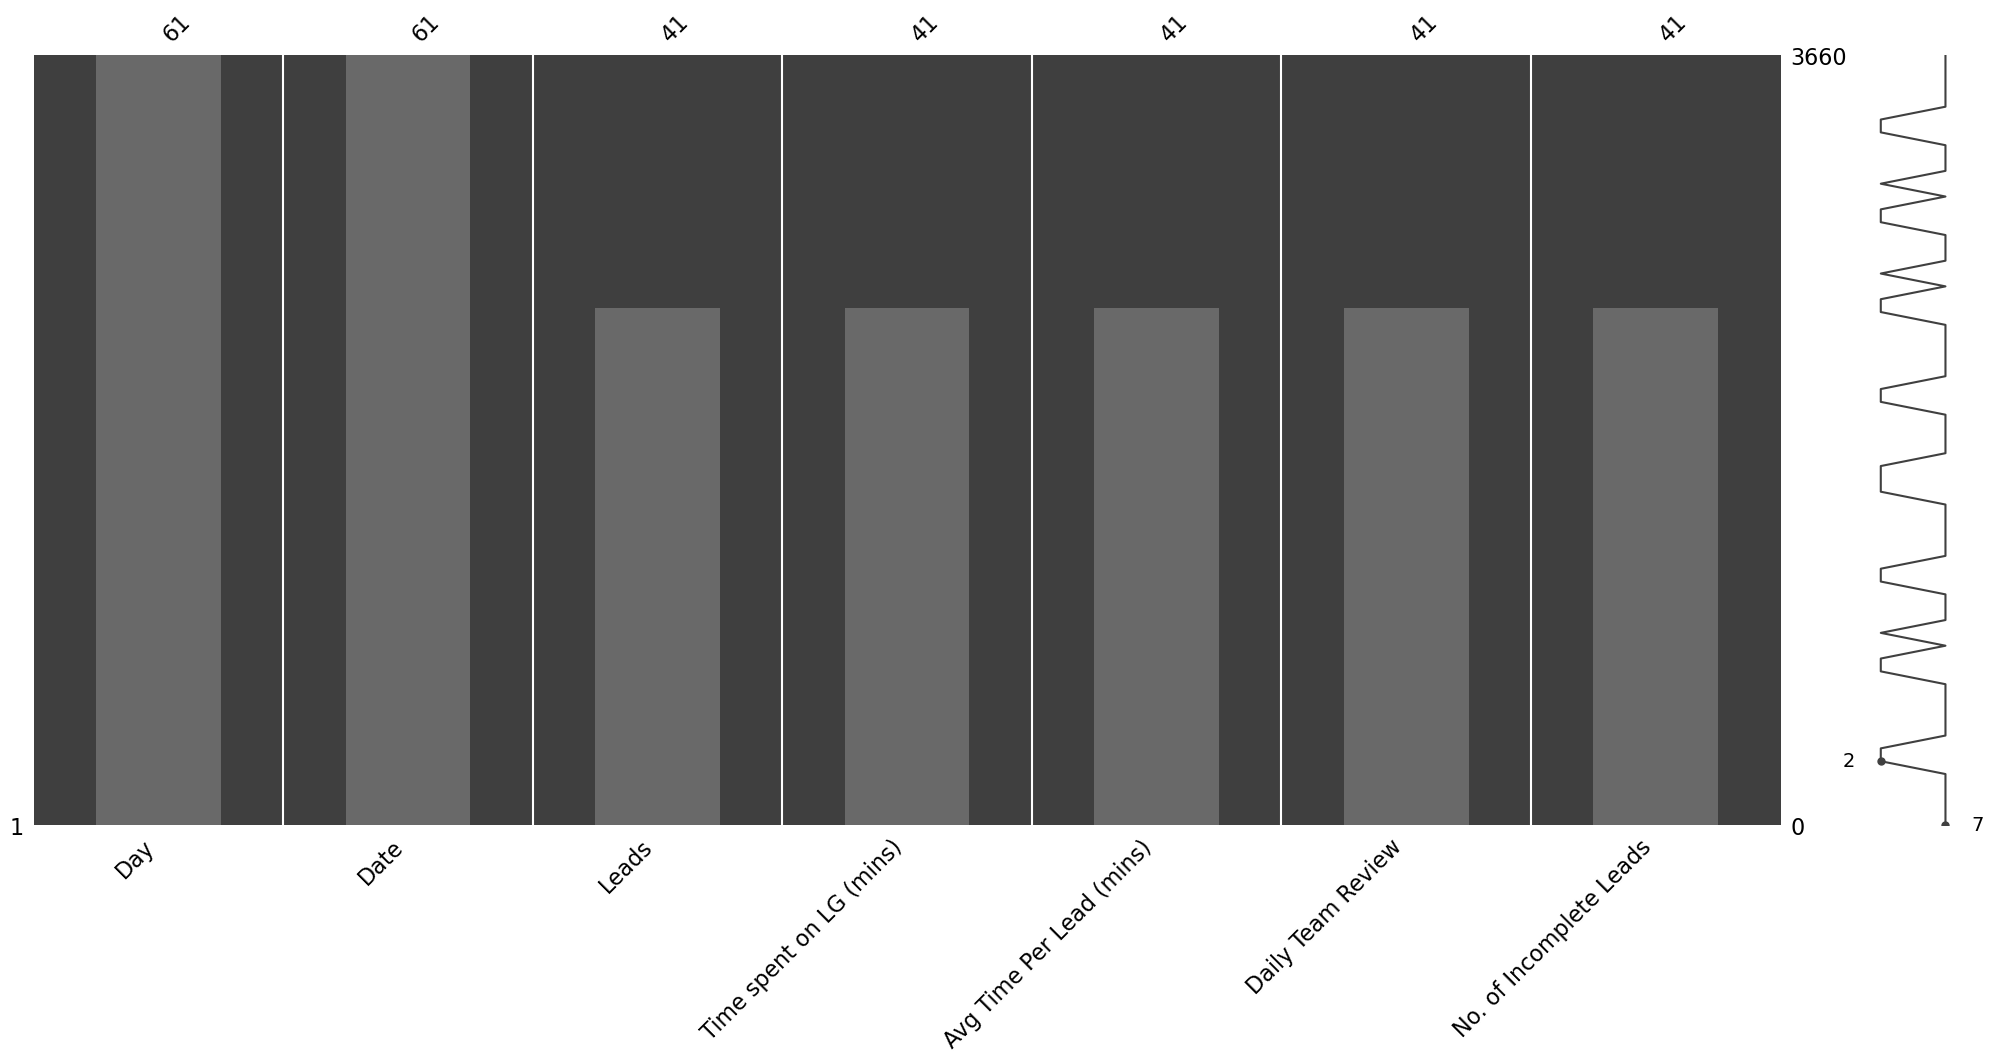

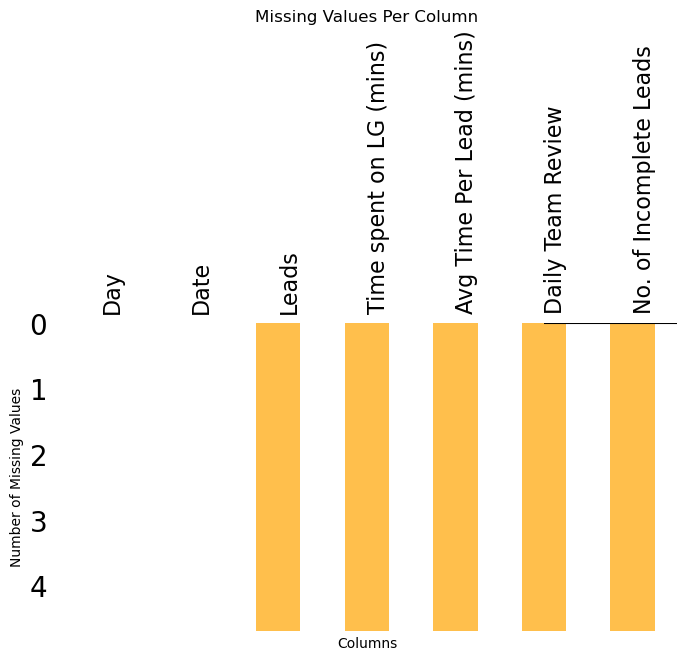

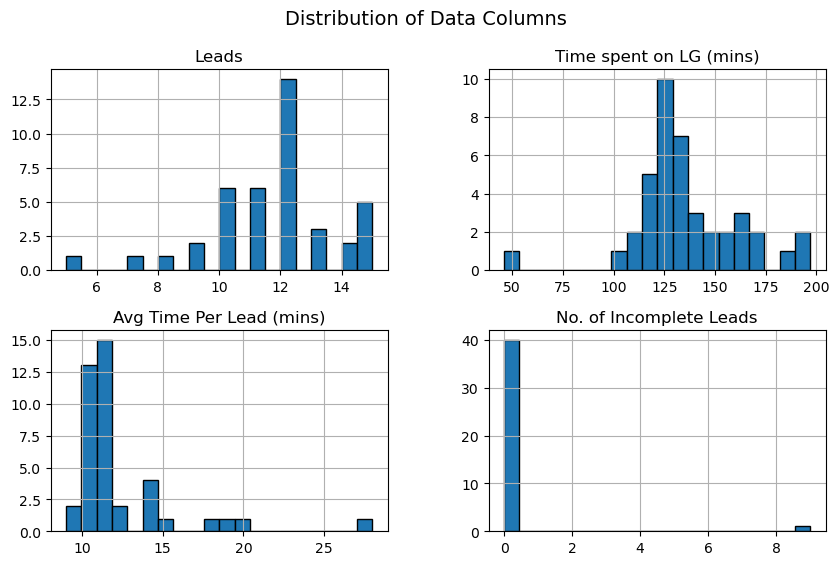

In [33]:
!pip install missingno
import missingno as msno

# Matrix visualization
msno.matrix(df)

# Bar chart showing the count of non-null values per column
msno.bar(df)

# Dendrogram to check missing value correlations
msno.dendrogram(df)
df.isnull().sum().plot(kind='bar', figsize=(8, 4), color='orange', alpha=0.7)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Per Column")
plt.show()
df.hist(figsize=(10,6), bins=20, edgecolor='black')
plt.suptitle("Distribution of Data Columns", fontsize=14)
plt.show()

   Day        Date  Leads  Time spent on LG (mins)  Avg Time Per Lead (mins)  \
0  Mon  12/06/2023    7.0                    197.0                      28.0   
1  Tue  13/06/2023    8.0                    153.0                      19.0   
2  Wed  14/06/2023    9.0                    161.0                      18.0   
3  Thu  15/06/2023    9.0                    184.0                      20.0   
4  Fri  16/06/2023   10.0                    141.0                      14.0   
5  Sat  17/06/2023    NaN                      NaN                       NaN   
6  Sun  18/06/2023    NaN                      NaN                       NaN   
7  Mon  19/06/2023   10.0                    145.0                      15.0   
8  Tue  20/06/2023   10.0                    136.0                      14.0   
9  Wed  21/06/2023   12.0                    125.0                      10.0   

   Daily Team Review  No. of Incomplete Leads  
0                1.0                      0.0  
1                1.0   

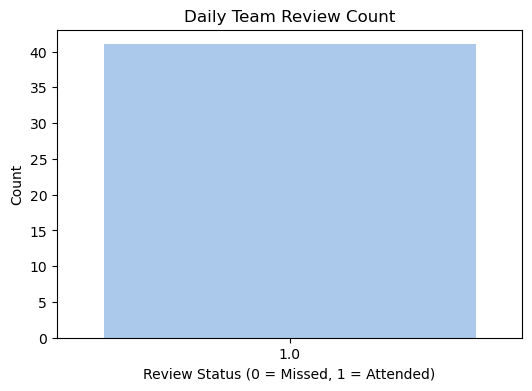

In [34]:
import pandas as pd
# Convert 'Daily Team Review' to numerical values
df['Daily Team Review'] = df['Daily Team Review'].map({'Attended': 1, 'Missed': 0})
# Display the updated DataFrame
print(df.head(10))  # Show first 5 rows
review_counts = df['Daily Team Review'].value_counts()
print("Daily Team Review Count:\n", review_counts)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['Daily Team Review'], palette="pastel")
plt.title("Daily Team Review Count")
plt.xlabel("Review Status (0 = Missed, 1 = Attended)")
plt.ylabel("Count")
plt.show()

In [35]:
from scipy.stats import skew
def check_skewness(df):
    num_cols = df.select_dtypes(include=['number']).columns  
    if num_cols.empty:
        print("No numerical columns found!")
        return
    df_filled = df[num_cols].apply(lambda x: x.fillna(x.median()) if x.isnull().sum() > 0 else x)
    skewness_values = df_filled.skew()
    decision = {}
    print("Column-wise Skewness and Decision:\n")
    for col in num_cols:
        skew_val = skewness_values[col]
        if -0.5 <= skew_val <= 0.5:
            decision[col] = "Use Mean ✅ (Data is Normally Distributed)"
        else:
            decision[col] = "Use Median ⚠️ (Data is Skewed)"
        print(f"{col}: Skewness = {skew_val:.2f} → {decision[col]}")
check_skewness(df)

Column-wise Skewness and Decision:

Leads: Skewness = -0.98 → Use Median ⚠️ (Data is Skewed)
Time spent on LG (mins): Skewness = 0.01 → Use Mean ✅ (Data is Normally Distributed)
Avg Time Per Lead (mins): Skewness = 3.64 → Use Median ⚠️ (Data is Skewed)
Daily Team Review: Skewness = 0.00 → Use Mean ✅ (Data is Normally Distributed)
No. of Incomplete Leads: Skewness = 7.81 → Use Median ⚠️ (Data is Skewed)


In [36]:
# Fill missing values based on skewness decision
df["Leads"].fillna(df["Leads"].median(), inplace=True)
df["Time spent on LG (mins)"].fillna(df["Time spent on LG (mins)"].mean(), inplace=True)
df["Avg Time Per Lead (mins)"].fillna(df["Avg Time Per Lead (mins)"].median(), inplace=True)
df["Daily Team Review"].fillna(df["Daily Team Review"].mean(), inplace=True)
df["No. of Incomplete Leads"].fillna(df["No. of Incomplete Leads"].median(), inplace=True)

df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12/06/2023,7.0,197.0,28.0,1.0,0.0
1,Tue,13/06/2023,8.0,153.0,19.0,1.0,0.0
2,Wed,14/06/2023,9.0,161.0,18.0,1.0,0.0
3,Thu,15/06/2023,9.0,184.0,20.0,1.0,0.0
4,Fri,16/06/2023,10.0,141.0,14.0,1.0,0.0
...,...,...,...,...,...,...,...
56,Mon,07/08/2023,12.0,121.0,10.0,1.0,0.0
57,Tue,08/08/2023,10.0,102.0,10.0,1.0,0.0
58,Wed,09/08/2023,12.0,115.0,10.0,1.0,0.0
59,Thu,10/08/2023,15.0,156.0,10.0,1.0,0.0


In [37]:
df.head(20)

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12/06/2023,7.0,197.000000,28.0,1.0,0.0
1,Tue,13/06/2023,8.0,153.000000,19.0,1.0,0.0
2,Wed,14/06/2023,9.0,161.000000,18.0,1.0,0.0
3,Thu,15/06/2023,9.0,184.000000,20.0,1.0,0.0
4,Fri,16/06/2023,10.0,141.000000,14.0,1.0,0.0
5,Sat,17/06/2023,12.0,135.829268,11.0,1.0,0.0
6,Sun,18/06/2023,12.0,135.829268,11.0,1.0,0.0
7,Mon,19/06/2023,10.0,145.000000,15.0,1.0,0.0
8,Tue,20/06/2023,10.0,136.000000,14.0,1.0,0.0
9,Wed,21/06/2023,12.0,125.000000,10.0,1.0,0.0


In [38]:
df["Leads"].fillna(df["Leads"].median(), inplace=True)
df["Time spent on LG (mins)"].fillna(df["Time spent on LG (mins)"].median(), inplace=True)
df["Avg Time Per Lead (mins)"].fillna(df["Avg Time Per Lead (mins)"].median(), inplace=True)
df["Daily Team Review"].fillna(df["Daily Team Review"].median(), inplace=True)
df["No. of Incomplete Leads"].fillna(df["No. of Incomplete Leads"].median(), inplace=True)
df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12/06/2023,7.0,197.0,28.0,1.0,0.0
1,Tue,13/06/2023,8.0,153.0,19.0,1.0,0.0
2,Wed,14/06/2023,9.0,161.0,18.0,1.0,0.0
3,Thu,15/06/2023,9.0,184.0,20.0,1.0,0.0
4,Fri,16/06/2023,10.0,141.0,14.0,1.0,0.0
...,...,...,...,...,...,...,...
56,Mon,07/08/2023,12.0,121.0,10.0,1.0,0.0
57,Tue,08/08/2023,10.0,102.0,10.0,1.0,0.0
58,Wed,09/08/2023,12.0,115.0,10.0,1.0,0.0
59,Thu,10/08/2023,15.0,156.0,10.0,1.0,0.0


In [39]:
from scipy.stats import skew
skewness_values = df[["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)", 
                      "Daily Team Review", "No. of Incomplete Leads"]].apply(skew)
print("Updated Skewness Values:\n", skewness_values)

Updated Skewness Values:
 Leads                      -0.956422
Time spent on LG (mins)    -0.256222
Avg Time Per Lead (mins)    3.548504
Daily Team Review                NaN
No. of Incomplete Leads     7.616867
dtype: float64


C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\pandas\core\apply.py:814: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.f(v)


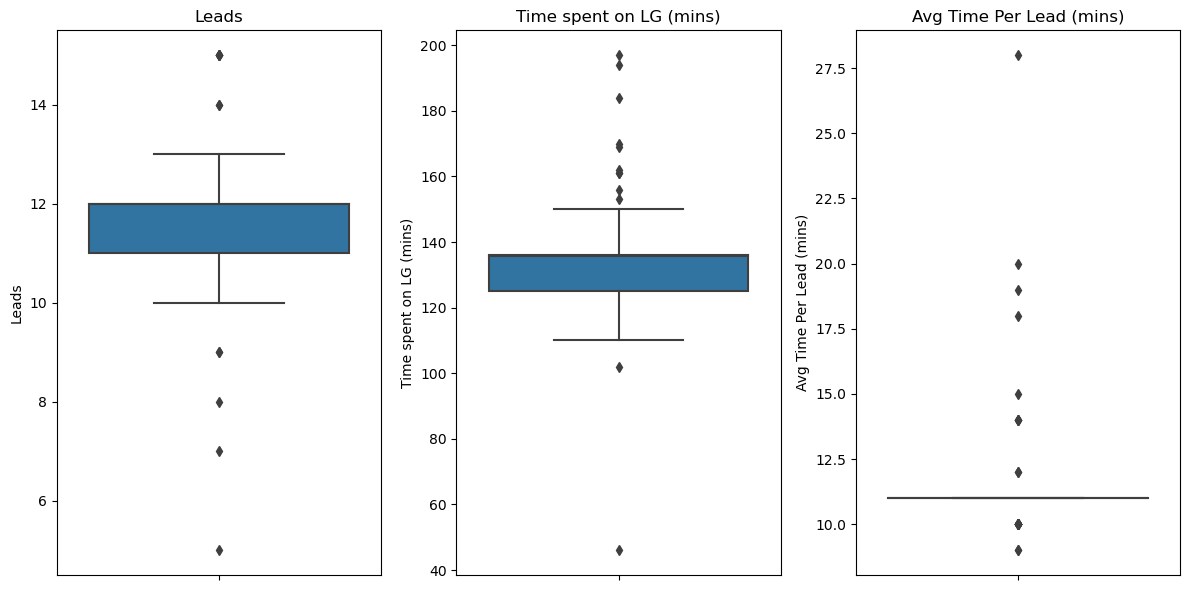

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns with high outlier percentages
high_outlier_cols = ["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)"]

# Boxplots for visualization
plt.figure(figsize=(12, 6))
for i, col in enumerate(high_outlier_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [41]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Function to check outlier percentage
def check_outliers(df, num_cols):
    print("Outlier Analysis for Numerical Columns:\n")
    
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier limits
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        # Decision criteria
        if outlier_percentage < 5:
            decision = "Keep outliers (low impact)."
        elif outlier_percentage <= 10:
            decision = "Consider removing (moderate impact)."
        else:
            decision = "Likely data issue, further analysis needed."
        
        print(f"{col}: {outlier_percentage:.2f}% outliers → {decision}")

# Call the function
check_outliers(df, num_cols)


Outlier Analysis for Numerical Columns:

Leads: 19.67% outliers → Likely data issue, further analysis needed.
Time spent on LG (mins): 19.67% outliers → Likely data issue, further analysis needed.
Avg Time Per Lead (mins): 42.62% outliers → Likely data issue, further analysis needed.
Daily Team Review: 0.00% outliers → Keep outliers (low impact).
No. of Incomplete Leads: 1.64% outliers → Keep outliers (low impact).


Outlier percentages after Winsorization: {'Leads': 19.67, 'Time spent on LG (mins)': 16.39, 'Avg Time Per Lead (mins)': 42.62}


C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignor

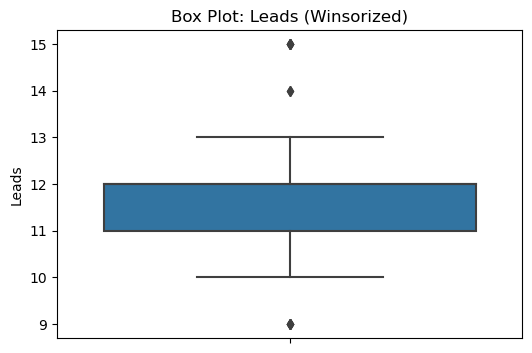

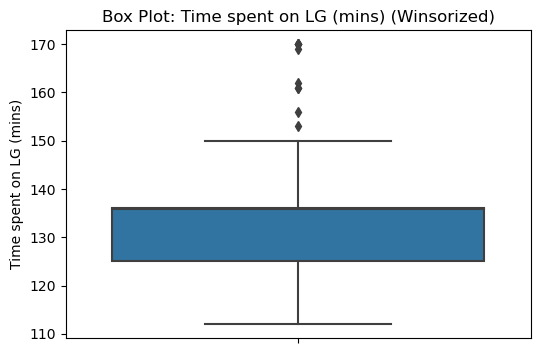

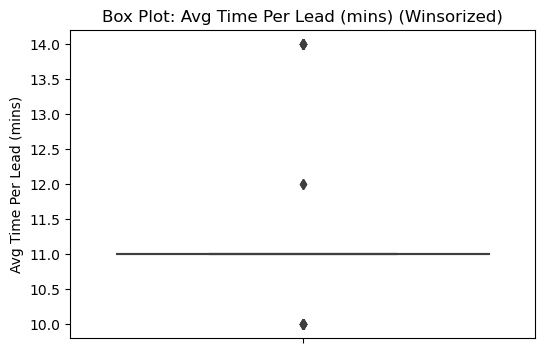

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Define columns to Winsorize
columns_to_winsorize = ["Leads", "Time spent on LG (mins)"]

# Apply Winsorization (limit extreme values to the 5th and 95th percentiles)
for col in columns_to_winsorize:
    df[col + " Winsorized"] = winsorize(df[col], limits=[0.05, 0.05])

# Handling "Avg Time Per Lead (mins)" separately (if Winsorization fails)
df["Avg Time Per Lead (mins) Winsorized"] = winsorize(df["Avg Time Per Lead (mins)"], limits=[0.10, 0.10])

# Function to count outliers after Winsorization
def count_outliers(df, cols):
    outlier_counts = {}
    for col in cols:
        col_name = col + " Winsorized"
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
        outlier_counts[col] = round(len(outliers) / len(df) * 100, 2)
    return outlier_counts

# Check outlier percentages after Winsorization
outliers_after = count_outliers(df, columns_to_winsorize + ["Avg Time Per Lead (mins)"])
print("Outlier percentages after Winsorization:", outliers_after)

# Generate separate box plots
for col in columns_to_winsorize + ["Avg Time Per Lead (mins)"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col + " Winsorized"])
    plt.title(f"Box Plot: {col} (Winsorized)")
    plt.ylabel(col)
    plt.show()


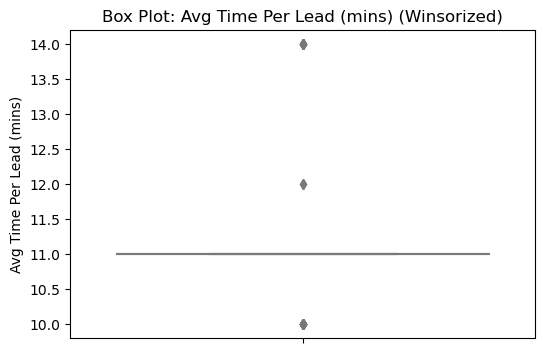

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for "Avg Time Per Lead (mins) Winsorized"
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Avg Time Per Lead (mins) Winsorized"], color="lightblue")
plt.title("Box Plot: Avg Time Per Lead (mins) (Winsorized)")
plt.ylabel("Avg Time Per Lead (mins)")
plt.show()


In [44]:
df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Leads Winsorized,Time spent on LG (mins) Winsorized,Avg Time Per Lead (mins) Winsorized
0,Mon,12/06/2023,7.0,197.0,28.0,1.0,0.0,9.0,170.0,14.0
1,Tue,13/06/2023,8.0,153.0,19.0,1.0,0.0,9.0,153.0,14.0
2,Wed,14/06/2023,9.0,161.0,18.0,1.0,0.0,9.0,161.0,14.0
3,Thu,15/06/2023,9.0,184.0,20.0,1.0,0.0,9.0,170.0,14.0
4,Fri,16/06/2023,10.0,141.0,14.0,1.0,0.0,10.0,141.0,14.0
...,...,...,...,...,...,...,...,...,...,...
56,Mon,07/08/2023,12.0,121.0,10.0,1.0,0.0,12.0,121.0,10.0
57,Tue,08/08/2023,10.0,102.0,10.0,1.0,0.0,10.0,112.0,10.0
58,Wed,09/08/2023,12.0,115.0,10.0,1.0,0.0,12.0,115.0,10.0
59,Thu,10/08/2023,15.0,156.0,10.0,1.0,0.0,15.0,156.0,10.0


In [45]:
df["Time spent on LG (mins)"] = df["Time spent on LG (mins)"].round(2)
print(df["Time spent on LG (mins)"].head(10))
df.to_csv("FINAL ARYA.csv", index=False)
df.head(10)

0    197.00
1    153.00
2    161.00
3    184.00
4    141.00
5    135.83
6    135.83
7    145.00
8    136.00
9    125.00
Name: Time spent on LG (mins), dtype: float64


,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Leads Winsorized,Time spent on LG (mins) Winsorized,Avg Time Per Lead (mins) Winsorized
0,Mon,12/06/2023,7.0,197.00,28.0,1.0,0.0,9.0,170.000000,14.0
1,Tue,13/06/2023,8.0,153.00,19.0,1.0,0.0,9.0,153.000000,14.0
2,Wed,14/06/2023,9.0,161.00,18.0,1.0,0.0,9.0,161.000000,14.0
3,Thu,15/06/2023,9.0,184.00,20.0,1.0,0.0,9.0,170.000000,14.0
4,Fri,16/06/2023,10.0,141.00,14.0,1.0,0.0,10.0,141.000000,14.0
5,Sat,17/06/2023,12.0,135.83,11.0,1.0,0.0,12.0,135.829268,11.0
6,Sun,18/06/2023,12.0,135.83,11.0,1.0,0.0,12.0,135.829268,11.0
7,Mon,19/06/2023,10.0,145.00,15.0,1.0,0.0,10.0,145.000000,14.0
8,Tue,20/06/2023,10.0,136.00,14.0,1.0,0.0,10.0,136.000000,14.0
9,Wed,21/06/2023,12.0,125.00,10.0,1.0,0.0,12.0,125.000000,10.0


In [49]:
df

,Day,Date,Daily Team Review,No. of Incomplete Leads,Leads Winsorized,Time spent on LG (mins) Winsorized,Avg Time Per Lead (mins) Winsorized
0,Mon,12/06/2023,1.0,0.0,9.0,170.0,14.0
1,Tue,13/06/2023,1.0,0.0,9.0,153.0,14.0
2,Wed,14/06/2023,1.0,0.0,9.0,161.0,14.0
3,Thu,15/06/2023,1.0,0.0,9.0,170.0,14.0
4,Fri,16/06/2023,1.0,0.0,10.0,141.0,14.0
...,...,...,...,...,...,...,...
56,Mon,07/08/2023,1.0,0.0,12.0,121.0,10.0
57,Tue,08/08/2023,1.0,0.0,10.0,112.0,10.0
58,Wed,09/08/2023,1.0,0.0,12.0,115.0,10.0
59,Thu,10/08/2023,1.0,0.0,15.0,156.0,10.0
